[[-0.64  0.16  0.   ...  0.    0.    0.  ]
 [ 0.16 -0.64  0.16 ...  0.    0.    0.  ]
 [ 0.    0.16 -0.64 ...  0.    0.    0.  ]
 ...
 [ 0.    0.    0.   ... -0.64  0.16  0.  ]
 [ 0.    0.    0.   ...  0.16 -0.64  0.16]
 [ 0.    0.    0.   ...  0.    0.16 -0.64]]


4096

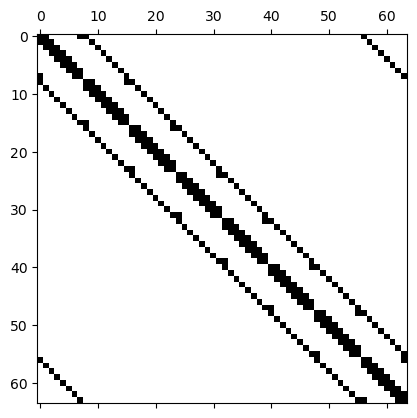

In [26]:
import numpy as np
from scipy.sparse import spdiags
import matplotlib.pyplot as plt


m = 8 # N value in x and y directions
n = m * m # total size of matrix
L = 20
dx = dy = L / m

e0 = np.zeros((n, 1)) # vector of zeros
e1 = np.ones((n, 1)) # vector of ones
e2 = np.copy(e1) # copy the one vector
e4 = np.copy(e0) # copy the zero vector
for j in range(1, m+1):
    e2[m*j-1] = 0 # overwrite every m^th value with zero
    e4[m*j-1] = 1 # overwirte every m^th value with one

# Shift to correct positions
e3 = np.zeros_like(e2)
e3[1:n] = e2[0:n-1]
e3[0] = e2[n-1]
e5 = np.zeros_like(e4)
e5[1:n] = e4[0:n-1]
e5[0] = e4[n-1]
# Place diagonal elements

diagonals = [e1.flatten(), e1.flatten(), e5.flatten(),
e2.flatten(), -4 * e1.flatten(), e3.flatten(),
e4.flatten(), e1.flatten(), e1.flatten()]
offset = [-(n-m), -m, -m+1, -1, 0, 1, m-1, m, (n-m)]
matA = spdiags(diagonals, offset, n, n).toarray() / (dx**2)
plt.spy(matA)
print(matA)
matA.size

A1 = matA

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


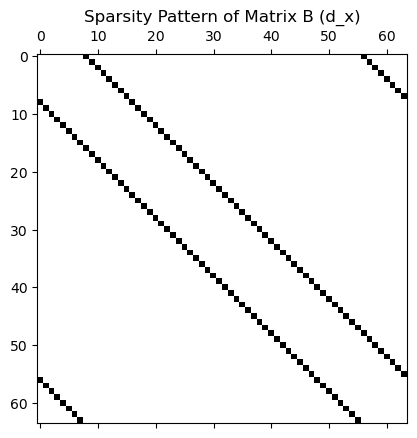

In [37]:
import numpy as np
from scipy.sparse import spdiags
import matplotlib.pyplot as plt

m = 8  # N value in x and y directions
n = m * m  # total size of matrix
e1 = np.ones((n, 1))  # vector of zeros
e2 = np.ones((n, 1))  # vector of ones
e3 = np.ones((n,1))  # copy the one vector
e4 = np.ones((n, 1 ))  # copy the zero vector


diagonals_B = [e1.flatten(), -e2.flatten(), e3.flatten(), -e4.flatten()]
offsets_B = [-n+m, -m, m , n-m]  # Below and above neighbors (one step in y-direction)

matB = spdiags(diagonals_B, offsets_B, n, n).toarray() / ( 2 * dx )

# Plot the sparsity pattern of the matrix C
plt.spy(matB)
plt.title("Sparsity Pattern of Matrix B (d_x)")


print(matB)
A2 = matB

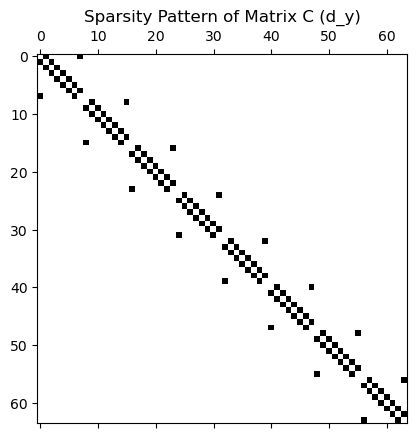

[[ 0.   0.2  0.  ...  0.   0.   0. ]
 [-0.2  0.   0.2 ...  0.   0.   0. ]
 [ 0.  -0.2  0.  ...  0.   0.   0. ]
 ...
 [ 0.   0.   0.  ...  0.   0.2  0. ]
 [ 0.   0.   0.  ... -0.2  0.   0.2]
 [ 0.   0.   0.  ...  0.  -0.2  0. ]]


In [38]:
import numpy as np
from scipy.sparse import spdiags
import matplotlib.pyplot as plt

m = 8  # N value in x and y directions
n = m * m  # total size of matrix
e1 = np.zeros((n, 1))  # vector of zeros
e2 = np.ones((n, 1))  # vector of ones
e3 = np.copy(e2)  # copy the one vector
e4 = np.copy(e1)  # copy the zero vector
for index in range(8):
    e1[8*index]= 1
    e2[8 * index + 7] = 0
    e3[8 * index] = 0 
    e4[8 * index + 7]= 1


diagonals_C = [e1.flatten(), -e2.flatten(), e3.flatten(), -e4.flatten()]
offsets_C = [-m+1, -1, 1 , m-1]  # Below and above neighbors (one step in y-direction)

matC = spdiags(diagonals_C, offsets_C, n, n).toarray() / ( 2 * dy)

# Plot the sparsity pattern of the matrix C
plt.spy(matC)
plt.title("Sparsity Pattern of Matrix C (d_y)")
plt.show()

print(matC)
A3 = matC